## Measure of Shape: Understanding Skewness 

Here are two statistical measures that describe the shape of a data distribution

### What is skewness?

Skewness measure the asymmentric (or degree to which a dataset deviated from normal distribution) of the probability distribution.

It is also known as Third Statistical Moment, E(X^3).

### Types of Skewness

- Skewness value of 0 indicates a symmentrical distribution.
- Positive skewness (skewness >0) indicates that the tail of the distribution is longer on the right side.
- Negative skewness (Skewness <0) indicates that the tail is longer on the left side.


**Note:** Mean, Median and Mode are not equal as for Normal Distribution.

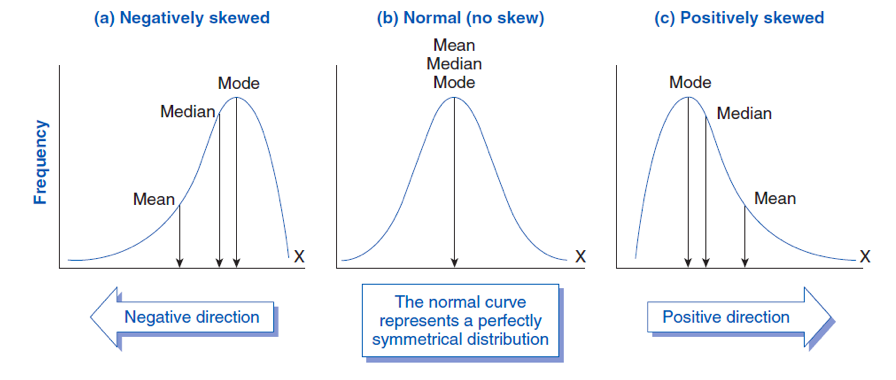

### Points to be remember

- If the majority of the extreme values is higher than the mean, the skewness will be positive because they increase the mean.
- If the majority of extreme values is smaller than the mean, the skewness is negative because they decrease the mean.
- Greater the skewness greater the distance between 3Ms.

### How to caluclate Skewness in Python?

One of the commonly used libraries for this purpose is `scipy.stats`

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew, kurtosis
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [13]:
# Example dataset
diamonds= sns.load_dataset("diamonds")
diamond_prices= diamonds["price"]

In [14]:
diamond_prices.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [15]:
diamond_prices.replace([np.inf, -np.inf], np.nan, inplace=True)

### Pandas Version

In [6]:
# Calculate skewness using pandas
skewness_pandas= skew(diamond_prices)

print("Skewness (pandas):", skewness_pandas)

Skewness (pandas): 1.6183502776053016


### SciPy Version

In [7]:
# Calculate skewness using scipy.stats
skewness_scipy= skew(diamond_prices)

print("Skewness (scipy):", skewness_scipy)

Skewness (scipy): 1.6183502776053016


In [8]:
skew(diamond_prices)

1.6183502776053016

Once you calculate skewness, you can categorize the extent of the skew:

- (-0.5, 0.5)- Low or approximately symmentric.
- (-1, -0.5)U(0.5, 1)- Moderately skewed/ symmentric.
- Beyond -1 and 1- Highly skewed/ symmentric.

**Note:** This conditions are true for all the distributions PDF's, not only for Normal Distribution.

The result suggests that the diamond price is `Highly skewed` ie., `Positively Skewed`.

### What is Kurtosis?

Kurtosis measures the `taildness` of probability distribution of a real valued random variable.

It is also known as Fourth Statistical Moment. E(X^4).

According to wikipedia, this number is related to the tails of the distribution, not its peak; hence, the sometimes-seen characterization of kurtosis as "Peakedness" is incorrect.

### Excess Kurtosis & Type

Excess kurtosis, also known as kurtosis excess, is a measure of how much a distribution deviates from a normal distribution in terms of its peakedness and tails.

It is defined as the kurtosis of a distribution minus 3, which means that a normal distribution has an excess kurtosis of 0 by definition.

`Excess kurtosis= (sample kurtosis-3)`

Depending on the degree, distributions have three types of kurtosis:

- Mesokurtic distribution (kurtosis= 3, excess kurtosis(sample kurtosis -3)=0); perfect normal distribution or very close to it.
- Leptokurtic distribution (kurtosis >3, excess kurtosis(sample kurtosis -3)>0); sharp peak, heavy tails
- Platykurtic distribution (kurtosis <3, excess kurtosis(sample kurtosis -3)<0); flat peak, light tails

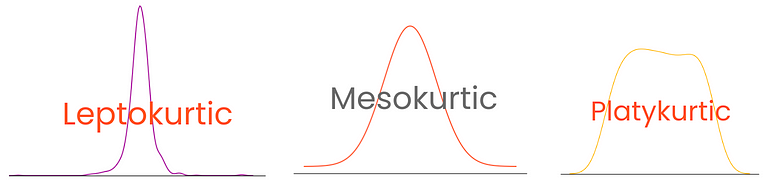

### How to calculate Kurtosis in Python?

#### Pandas Version

In [9]:
#calculate kurtosis using pandas
kurtosis_pandas= diamond_prices.kurtosis()

print("Kurtosis (Pandas):", kurtosis_pandas)

Kurtosis (Pandas): 2.17769575924869


#### SciPy Version

In [10]:
# Calculate kurtosis using scipy.stats
kurtosis_scipy= kurtosis(diamond_prices)

print("Kurtosis (scipy):", kurtosis_scipy)

Kurtosis (scipy): 2.177382669056634


And we find out that diamond prices have an excess kurtosis of 2.17, which means if we plot the distribution, it will have a fatter tail.

**Note:** The results are slightly different, but `scipy.stats` is mostly preffered due to its capability for more advanced statistical analysis or the ability to perform computation on arrays.

Let's visualize!

### Visualizing Skewness

One of the best visuals to see the shape and, thus, the skewness of distributions is a kernel density estimate (KDE) plot. It is available to use through Seaborn:

In [11]:
import matplotlib.pyplot as plt

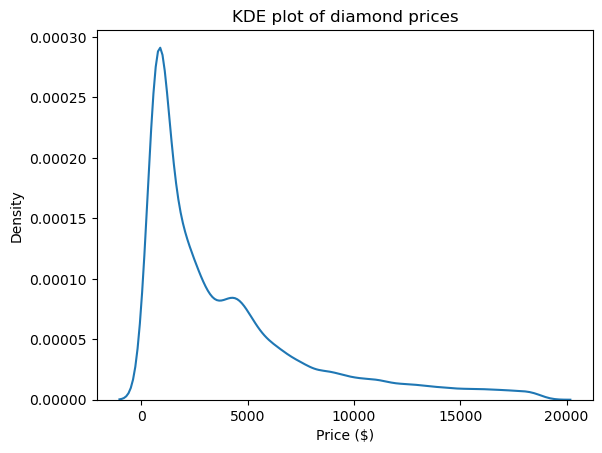

In [18]:
sns.kdeplot(diamond_prices)

plt.title("KDE plot of diamond prices")
plt.xlabel("Price ($)")
plt.show()

### How to handle Skewness in Data?

Skewness and Kurtosis often overloaded in Exploratory Data Analysis, reveal significant insights abount the future nature of distributions.

We know that, Machine Learning models like linear and logistic regression, assume that the variable follow a normal distribution. More likely, variables in real datasets will follow a skewed distribution.

For this reason, by applying some transformations to these skewed variables, we can map this skewed distribution to a normal distribution to increase the performance of our models.

### Types of Transformations:

- **Log Transformation:** The log transform is commonly used to convert a skewed distribution into a normal or less skewed one. This transformation is not applied to these features which have negative values. This transformation is mostly applied toright-skewed data. Convert data from the addictive scale to multiplicative scale, ie., linearly distributed data.

- -**Reciprocal Transformation:** This transformation is not defined for zero. It is a powerful with a radical effect. This transformation revereses the order among values of the same sign, so large values become smaller and vice-versa.

- **Square Transformation:** This transformation mostly applies to left-skewed data.

- **Square Root Transformation:** This transformation is defined only for positive numbers. This can be used for reducing the skewness of right-skewed data. This transformation is weaker than Log Transformation.

- **Power Transformations:** Power transforms are a family of parametric, monotonic transformations that make data more Guassian-like. The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood. This is useful for modelling issues related to non-constant variance or other situations where normality is desired. Currently, Power Transformer supports the Box-Cox transform and the Yeo-Johnson transform.

By default, zero-mean, unit-variance normalization is applied to the transformed data.

1. **Box-Cox Transformation:** It requires the input data to be strictly positive(not even zero is acceptable). Sqrt/sqr/log are the special cases of this transformation.
2. **Yeo-Johnson Transformation:** It is a variation of the Box-Cox and supports both positive and negative data.

**Custom Transformation:** A Function Transformer forwards its X (and optionally y) arguments to a user-defined function or function object and returns this function's result. The resulting transformer will not be pickleable if lambda is used as the function. This is useful for stateless transformations such as taking the log of frequencies. doing custom scaling etc.

### Implementing the Transformers

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer, PowerTransformer

In [3]:
# Generate skewed dataset
np.random.seed(42)
skewed_data= np.random.chisquare(df=3, size=1000) #Generate chi-square distribution (skewed)

### We can also `histplot` to identify skewness in data

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


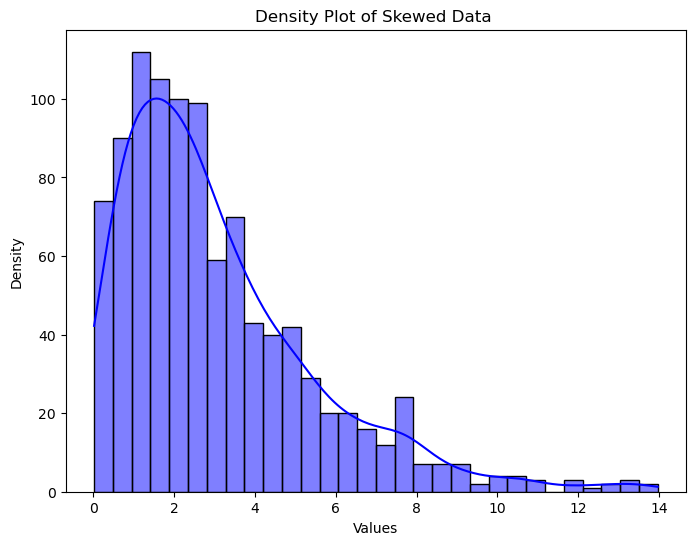

In [4]:
# Plot density plot of skewed data
plt.figure(figsize=(8,6))
sns.histplot(skewed_data, kde=True, color='blue', bins=30)
plt.title("Density Plot of Skewed Data ")
plt.xlabel("Values")
plt.ylabel("Density")
plt.show()

### Transformed Functions

In [6]:
# Simple transformation functions
log_transform= FunctionTransformer(np.log1p, validate=True) #Log Transformation
reciprocal_transform= FunctionTransformer(lambda x:1/x, validate=True) # Reciprocal transformation
square_transform= FunctionTransformer(lambda x:x**2, validate=True) # Square transformation
sqrt_transform= FunctionTransformer(np.sqrt, validate=True) # Square root transformation

In [7]:
# Power Trnasformation (Box-Cox)
boxcox_transformer= PowerTransformer(method="box-cox")
yeojohnson_transformer= PowerTransformer(method="yeo-johnson")

In [12]:
# Apply transformations to skewed data
transformed_data= {
    "Original" : skewed_data,
    "Log Transformation" : log_transform.transform(skewed_data.reshape(-1, 1)).flatten(),
    "Reciprocal Transformation" : reciprocal_transform.transform(skewed_data.reshape(-1, 1)).flatten(),
    "Square Transformation" : square_transform.transform(skewed_data.reshape(-1,1)).flatten(),
    "Square Root Transformation" : sqrt_transform.transform(skewed_data.reshape(-1,1)).flatten(),
    "Box-Cox Transformation" : boxcox_transformer.fit_transform(skewed_data.reshape(-1,1)).flatten(),
    "Yeo-Johnson Transformation" : yeojohnson_transformer.fit_transform(skewed_data.reshape(-1,1)).flatten()
}

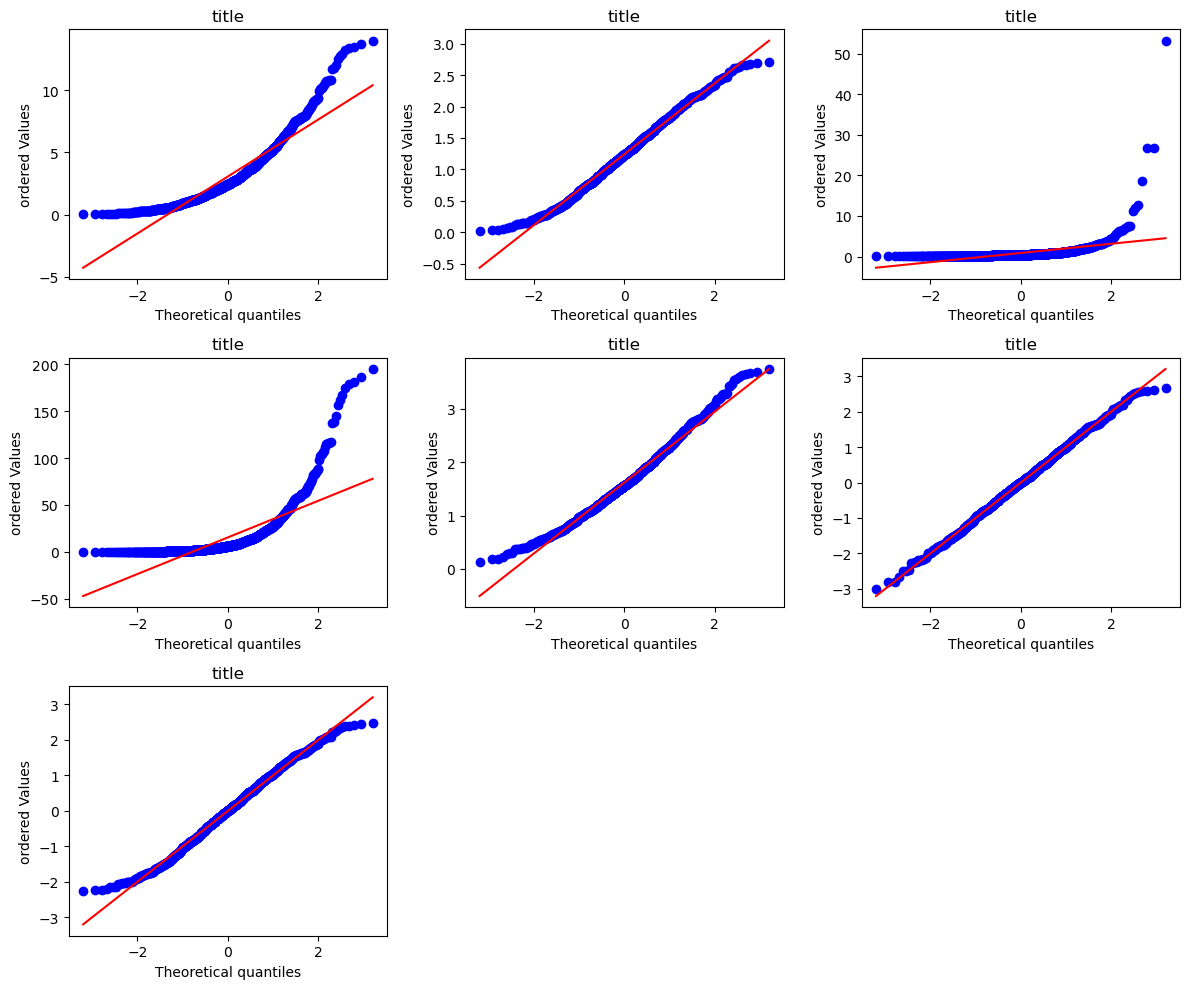

In [14]:
# Create QQ plot for each transformed data
plt.figure(figsize=(12,10))
for i, (title, data) in enumerate(transformed_data.items(), 1):
    plt.subplot(3,3,i)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title("title")
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("ordered Values")
plt.tight_layout()
plt.show()

### Wondering what does these plot signifies?

`QQ plot` or `Quantile-Quantile plot` is a graphical tool used access whether a given dataset follows a certain probability distribution, typiclly but not necessarily the normal distribution.

It compares the quantiles of the dataset against the quantiles of a theoretical distribution (usually the normal distribution).

### Here's how to interpret a QQ plot:

- **Line of Equality:** The QQ plot displays the ordered values of the dataset on the x-axis and the corresponding quantiles from the theoretical distribution on the y-axis.

If the dataset perfectly follows the Line of Equality provides will fall along the diagnol line (Line of Equality), indicating that the quantiles match exactly.

- **Pattern**: The pattern of deviation from the Line of Equality provides insights into the nature of the departure from the theoretical distribution.
  - If the points deviate mainly in the tails, it suggests difference in tails behavior.
  - If the points deviate mainly in the center, it suggests difference in central tendency.

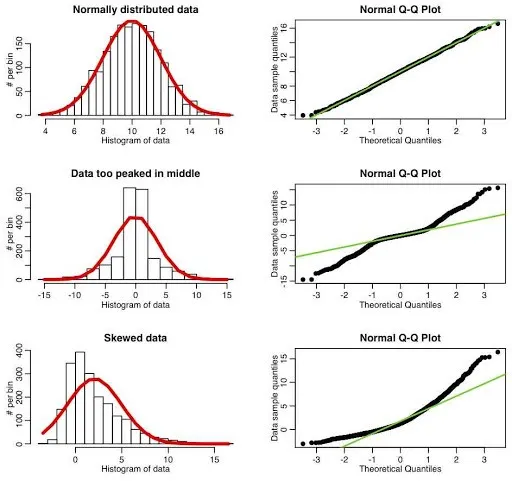

Based on this interpretation we can say that, using transformers we are successfully abled to transform our skewed data to normal distribution for prediction.